In [758]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils 
from sklearn.cluster import KMeans # the clustering algorithm
from sklearn.decomposition import PCA # dimentional reduction algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler # need for data normalizing
from sklearn.svm import SVC



In [759]:
df = pd.read_csv("diabetes_data_upload.csv")     # read data.csv into panada dataframe
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


<AxesSubplot:xlabel='class', ylabel='count'>

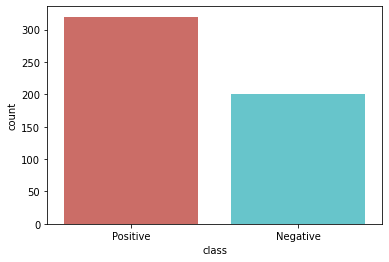

In [760]:
sn.countplot(x='class',data=df, palette='hls')   # plot the labels count


In [761]:
df.isnull().sum()  # check if there is any null values

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

<AxesSubplot:>

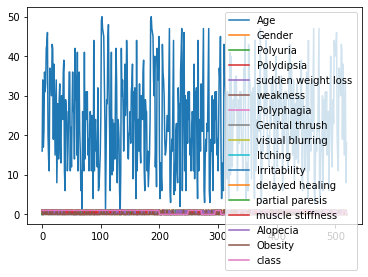

In [785]:
df.plot()   #plot the data

In [762]:
from sklearn import preprocessing 
   
label_encoder = preprocessing.LabelEncoder() 

df=df.apply(label_encoder.fit_transform)                  # apply label encoding to this categorical data
  

In [763]:
df.head()         # print data after label encoding

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [764]:
dfs = StandardScaler().fit_transform(df) # normalizing the data 
print(dfs)

[[-0.67321655  0.76509206 -0.99233705 ...  1.38022749  2.21564684
   0.79056942]
 [ 0.85957521  0.76509206 -0.99233705 ...  1.38022749 -0.45133547
   0.79056942]
 [-0.58806145  0.76509206  1.00772212 ...  1.38022749 -0.45133547
   0.79056942]
 ...
 [ 0.85957521 -1.30703226  1.00772212 ... -0.72451824  2.21564684
   0.79056942]
 [-1.35445733 -1.30703226 -0.99233705 ...  1.38022749 -0.45133547
  -1.26491106]
 [-0.50290636  0.76509206 -0.99233705 ... -0.72451824 -0.45133547
  -1.26491106]]


In [765]:
X = df.drop(['class'], axis='columns', inplace=False)
y = df['class']
# split the labels out from data and store it in variable y

In [766]:
X_train, x_test, y_train, y_test = train_test_split(X, y)
# split data into train and tesr set

In [767]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

logistic_regression.score(x_test, y_test)

# creat the logistic regression model and printing the accuracy score

0.9

In [768]:
pca = PCA(n_components=17)
principalComponents = pca.fit_transform(dfs)


# applying pca and get the principle components


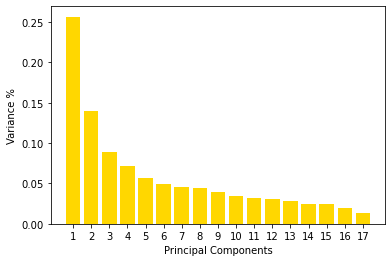

In [769]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
# Plotting the variances for every PC

pc = pd.DataFrame(principalComponents)
# store principal components in a dataframe


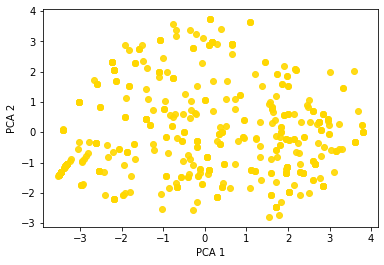

In [770]:
plt.scatter(pc[0],pc[1], alpha=.9, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

#plot the first two pc as they have the most variance as we shown in tyhe above plot

In [771]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dfs)
X_pca.shape

#applying pca algorithm and reduce the data features into 2 feature

(520, 2)

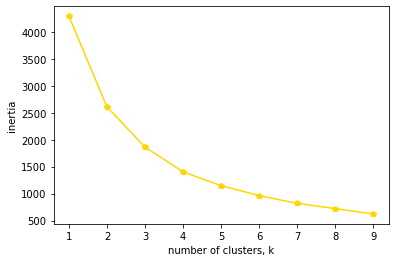

In [772]:
inertias = []

for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    model.fit(pc.iloc[:,:3])
   
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')

plt.show()

#applyin the elbow algorithm that helps us to choose the number of clusters we will pass to the kmean algorithm


In [773]:
# we found that the elbow point is at the 2 clusters

In [774]:
# so lets use kmean algorithm for 2 cluster

In [775]:
X_train, x_test, y_train, y_test = train_test_split(X_pca, y)
# split the data again to train and test set but this time using the data after dimention reduction using pca

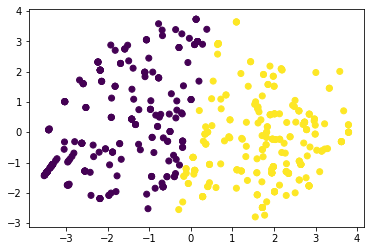

In [776]:
model = KMeans(n_clusters=2)
model.fit(X_pca)
# apply kmeans algorithm with 2 clustering and fit our train data
labels = model.predict(X_pca)
# using kmeans to predict 

plt.scatter(pc[0], pc[1],c=labels)
plt.show()
# plot the first two pc consedering the labels and this is the final shape of our data after clustering

In [777]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = pd.crosstab(y, labels, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)



# print confusion matrix for kmeans algorithm

Predicted    0    1
Actual             
0          187   13
1           73  247


In [778]:
score = metrics.accuracy_score(y_test,model.predict(x_test))
score

# print the accuracy of kmeans algorithm on test data

0.8384615384615385

In [779]:
score = metrics.accuracy_score(y,labels)
score

# print the accuracy of kmeans algorithm on training data

0.8346153846153846

In [780]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(x_test)
# apply logistic regression again after pca dimention reduction

In [781]:
logistic_regression.score(x_test, y_test)
 # print out the accuracy of the logistic model after pca applied 

0.9538461538461539

In [782]:
print(classification_report(y_test,y_pred))

# print classification report for our model

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        51
           1       0.97      0.95      0.96        79

    accuracy                           0.95       130
   macro avg       0.95      0.96      0.95       130
weighted avg       0.95      0.95      0.95       130



In [783]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

# print out the confusion matric for our model


Predicted   0   1
Actual           
0          49   2
1           4  75


In [784]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
    
# applyin the ensamble model and print out the accuracy of the model beside the accuracy of each individual model for comparison


LogisticRegression 0.9538461538461539
RandomForestClassifier 0.9615384615384616
SVC 0.9615384615384616
VotingClassifier 0.9615384615384616
